In [1]:
# Importation des librairies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
%matplotlib inline

pd.set_option('display.max_columns', 200)
pd.set_option('display.max_rows', 200)
pd.options.mode.chained_assignment = None  # default='warn'

## Importation et description

In [2]:
# Importation des données dans des dataframe

raw_data = pd.read_csv('en.openfoodfacts.org.products.csv', sep='\t')

/Users/louisrageot/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (0,8,13,22,23,27,28,29,31,47,52,55,64) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
raw_data.head(50)

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,abbreviated_product_name,generic_name,quantity,packaging,packaging_tags,packaging_text,brands,brands_tags,categories,categories_tags,categories_en,origins,origins_tags,origins_en,manufacturing_places,manufacturing_places_tags,labels,labels_tags,labels_en,emb_codes,emb_codes_tags,first_packaging_code_geo,cities,cities_tags,purchase_places,stores,countries,countries_tags,countries_en,ingredients_text,allergens,allergens_en,traces,traces_tags,traces_en,serving_size,serving_quantity,no_nutriments,additives_n,additives,additives_tags,additives_en,ingredients_from_palm_oil_n,ingredients_from_palm_oil,ingredients_from_palm_oil_tags,ingredients_that_may_be_from_palm_oil_n,ingredients_that_may_be_from_palm_oil,ingredients_that_may_be_from_palm_oil_tags,nutriscore_score,nutriscore_grade,nova_group,pnns_groups_1,pnns_groups_2,states,states_tags,states_en,brand_owner,ecoscore_score_fr,ecoscore_grade_fr,main_category,main_category_en,image_url,image_small_url,image_ingredients_url,image_ingredients_small_url,image_nutrition_url,image_nutrition_small_url,energy-kj_100g,energy-kcal_100g,energy_100g,energy-from-fat_100g,fat_100g,saturated-fat_100g,-butyric-acid_100g,-caproic-acid_100g,-caprylic-acid_100g,-capric-acid_100g,-lauric-acid_100g,-myristic-acid_100g,-palmitic-acid_100g,-stearic-acid_100g,-arachidic-acid_100g,-behenic-acid_100g,-lignoceric-acid_100g,-cerotic-acid_100g,-montanic-acid_100g,-melissic-acid_100g,monounsaturated-fat_100g,polyunsaturated-fat_100g,omega-3-fat_100g,-alpha-linolenic-acid_100g,-eicosapentaenoic-acid_100g,-docosahexaenoic-acid_100g,omega-6-fat_100g,-linoleic-acid_100g,-arachidonic-acid_100g,-gamma-linolenic-acid_100g,-dihomo-gamma-linolenic-acid_100g,omega-9-fat_100g,-oleic-acid_100g,-elaidic-acid_100g,-gondoic-acid_100g,-mead-acid_100g,-erucic-acid_100g,-nervonic-acid_100g,trans-fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,-sucrose_100g,-glucose_100g,-fructose_100g,-lactose_100g,-maltose_100g,-maltodextrins_100g,starch_100g,polyols_100g,fiber_100g,-soluble-fiber_100g,-insoluble-fiber_100g,proteins_100g,casein_100g,serum-proteins_100g,nucleotides_100g,salt_100g,sodium_100g,alcohol_100g,vitamin-a_100g,beta-carotene_100g,vitamin-d_100g,vitamin-e_100g,vitamin-k_100g,vitamin-c_100g,vitamin-b1_100g,vitamin-b2_100g,vitamin-pp_100g,vitamin-b6_100g,vitamin-b9_100g,folates_100g,vitamin-b12_100g,biotin_100g,pantothenic-acid_100g,silica_100g,bicarbonate_100g,potassium_100g,chloride_100g,calcium_100g,phosphorus_100g,iron_100g,magnesium_100g,zinc_100g,copper_100g,manganese_100g,fluoride_100g,selenium_100g,chromium_100g,molybdenum_100g,iodine_100g,caffeine_100g,taurine_100g,ph_100g,fruits-vegetables-nuts_100g,fruits-vegetables-nuts-dried_100g,fruits-vegetables-nuts-estimate_100g,collagen-meat-protein-ratio_100g,cocoa_100g,chlorophyl_100g,carbon-footprint_100g,carbon-footprint-from-meat-or-fish_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g,choline_100g,phylloquinone_100g,beta-glucan_100g,inositol_100g,carnitine_100g
0,00000000000000225,http://world-en.openfoodfacts.org/product/0000...,nutrinet-sante,1623855208,2021-06-16T14:53:28Z,1623855209,2021-06-16T14:53:29Z,jeunes pousses,NaN,NaN,NaN,NaN,NaN,NaN,endives,endives,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,en:france,en:france,France,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,unknown,unknown,"en:to-be-completed, en:nutrition-facts-to-be-c...","en:to-be-completed,en:nutrition-facts-to-be-co...","To be completed,Nutrition facts to be complete...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

In [4]:
raw_data.columns.nunique()

186

In [5]:
raw_data.shape

(1838610, 186)

### Taux de remplissage

code                                          100.000000
created_datetime                              100.000000
last_modified_datetime                        100.000000
states_tags                                   100.000000
states                                        100.000000
last_modified_t                               100.000000
states_en                                     100.000000
created_t                                     100.000000
url                                           100.000000
creator                                        99.999782
pnns_groups_2                                  99.961003
countries                                      99.695041
countries_en                                   99.694769
countries_tags                                 99.694769
pnns_groups_1                                  99.669696
product_name                                   95.716710
energy_100g                                    79.344233
proteins_100g                  

<AxesSubplot:>

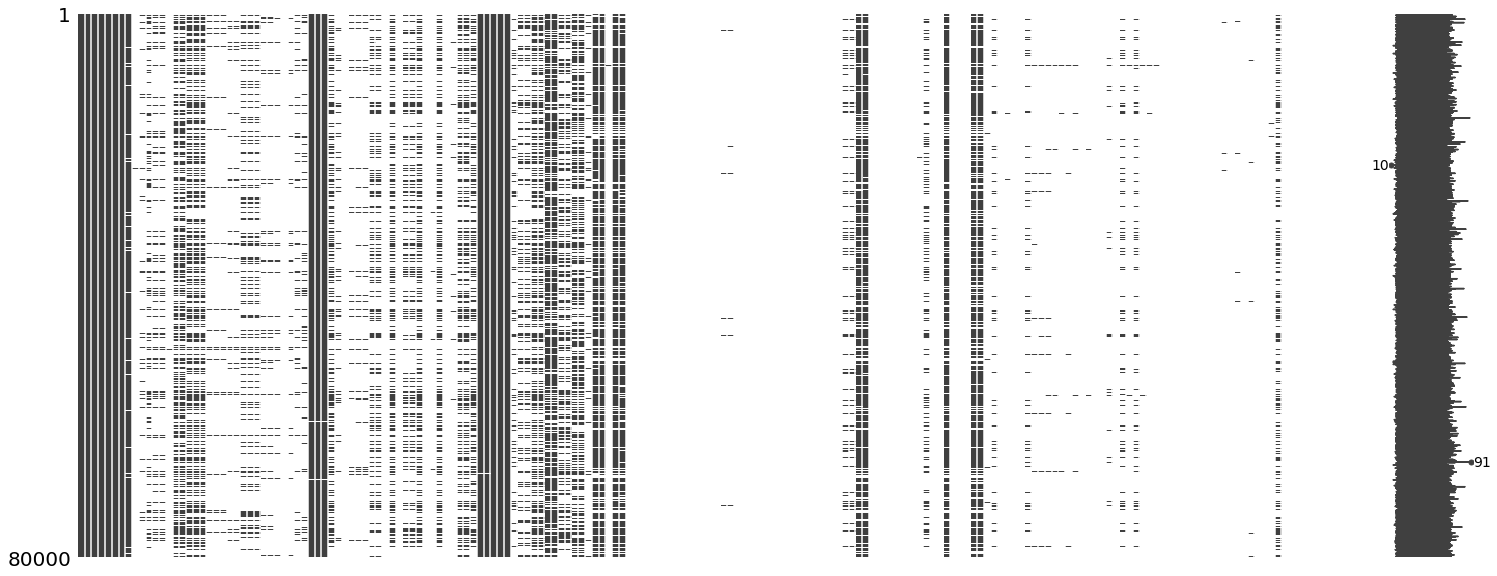

In [6]:
# Taux de remplissage
import missingno as msno
missing = ((1 - raw_data.isnull().mean())*100).sort_values(ascending=False)
#missing = raw_data.shape[0]-raw_data.isnull().sum().sort_values(ascending=True)
print(missing)

# Aperçu des missing data
%matplotlib inline
msno.matrix(raw_data.sample(80000))

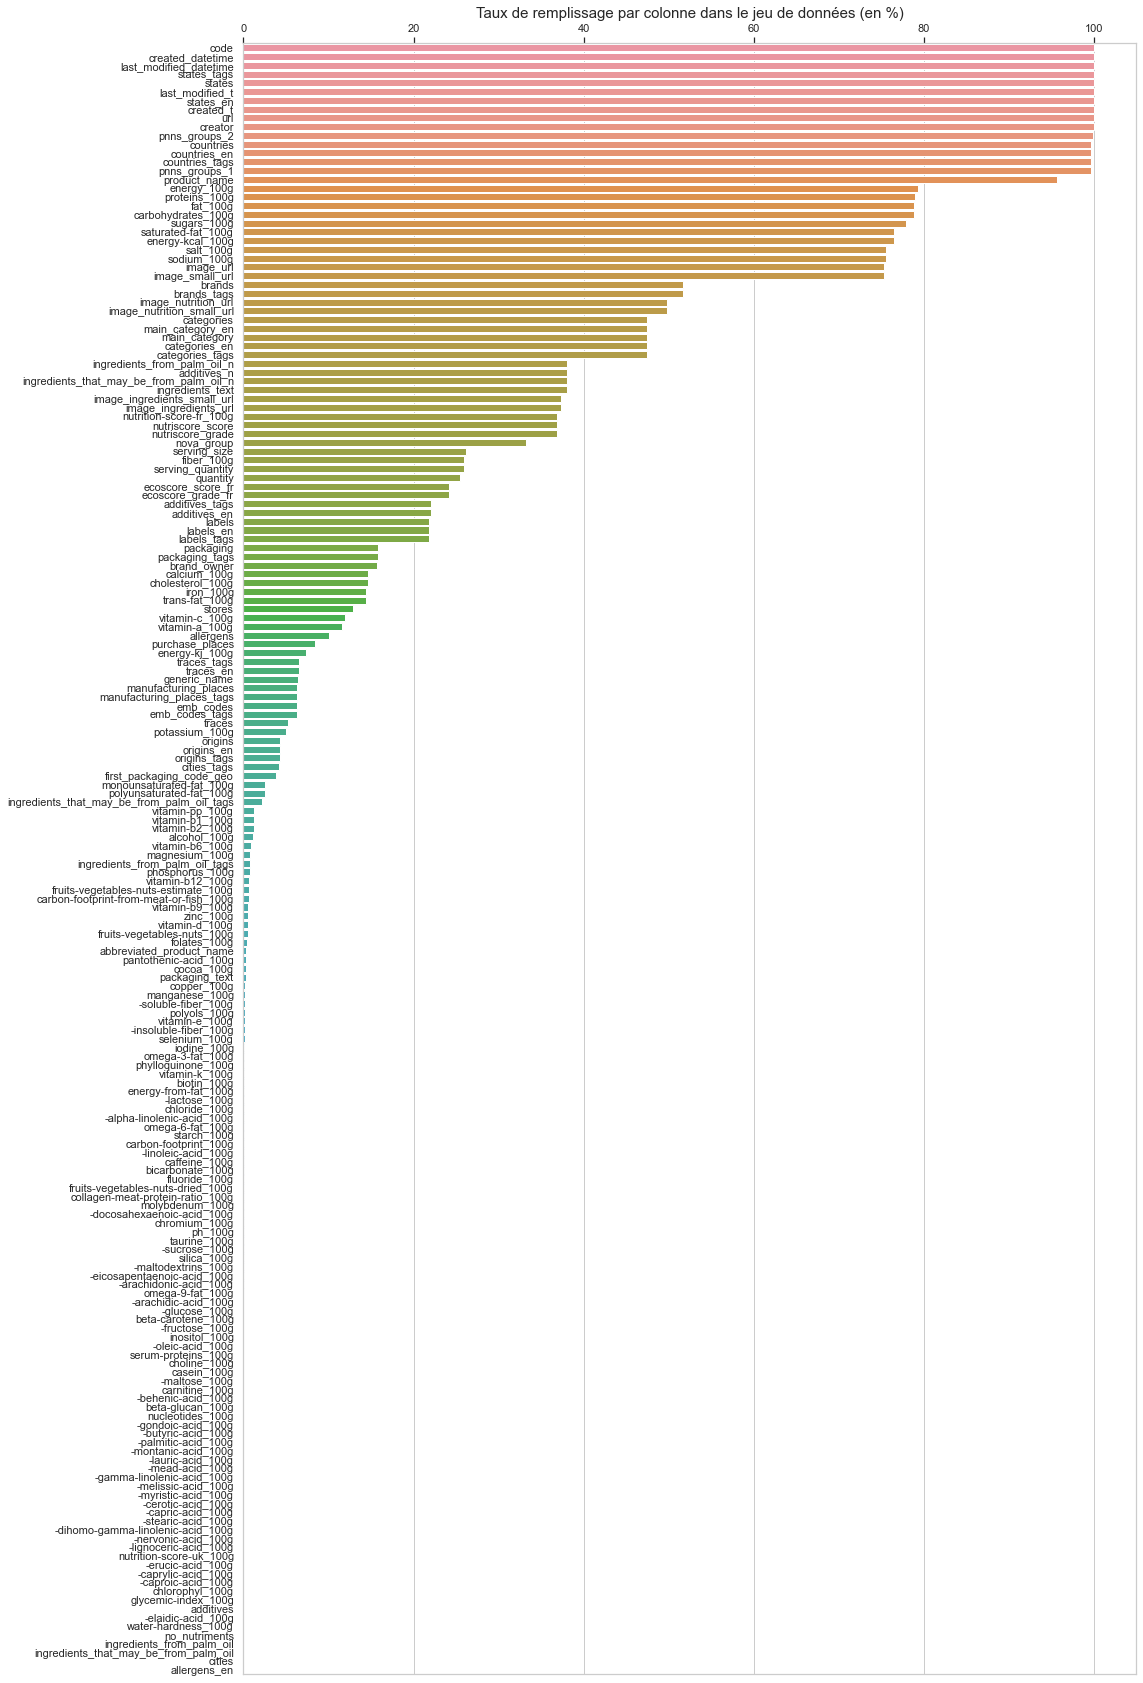

In [7]:
# Taux de remplissage par colonne dans le jeu de données (en %)
sns.set(style="whitegrid")
plt.figure(figsize=(16, 30))
ax = sns.barplot(y=missing.index, x=missing.values)
ax.xaxis.set_ticks_position('top')
plt.title('Taux de remplissage par colonne dans le jeu de données (en %)', size=15)
plt.show()

### Répartition des taux de remplissage

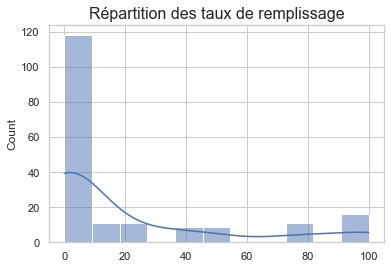

In [8]:
ax = sns.histplot(missing.values, kde=True)
plt.title('Répartition des taux de remplissage', size=16)
plt.show()

## Nettoyage

### Suppression des duplicates

In [9]:
# Duplicates dans raw_data
raw_data[raw_data.duplicated() == True]

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,abbreviated_product_name,generic_name,quantity,packaging,packaging_tags,packaging_text,brands,brands_tags,categories,categories_tags,categories_en,origins,origins_tags,origins_en,manufacturing_places,manufacturing_places_tags,labels,labels_tags,labels_en,emb_codes,emb_codes_tags,first_packaging_code_geo,cities,cities_tags,purchase_places,stores,countries,countries_tags,countries_en,ingredients_text,allergens,allergens_en,traces,traces_tags,traces_en,serving_size,serving_quantity,no_nutriments,additives_n,additives,additives_tags,additives_en,ingredients_from_palm_oil_n,ingredients_from_palm_oil,ingredients_from_palm_oil_tags,ingredients_that_may_be_from_palm_oil_n,ingredients_that_may_be_from_palm_oil,ingredients_that_may_be_from_palm_oil_tags,nutriscore_score,nutriscore_grade,nova_group,pnns_groups_1,pnns_groups_2,states,states_tags,states_en,brand_owner,ecoscore_score_fr,ecoscore_grade_fr,main_category,main_category_en,image_url,image_small_url,image_ingredients_url,image_ingredients_small_url,image_nutrition_url,image_nutrition_small_url,energy-kj_100g,energy-kcal_100g,energy_100g,energy-from-fat_100g,fat_100g,saturated-fat_100g,-butyric-acid_100g,-caproic-acid_100g,-caprylic-acid_100g,-capric-acid_100g,-lauric-acid_100g,-myristic-acid_100g,-palmitic-acid_100g,-stearic-acid_100g,-arachidic-acid_100g,-behenic-acid_100g,-lignoceric-acid_100g,-cerotic-acid_100g,-montanic-acid_100g,-melissic-acid_100g,monounsaturated-fat_100g,polyunsaturated-fat_100g,omega-3-fat_100g,-alpha-linolenic-acid_100g,-eicosapentaenoic-acid_100g,-docosahexaenoic-acid_100g,omega-6-fat_100g,-linoleic-acid_100g,-arachidonic-acid_100g,-gamma-linolenic-acid_100g,-dihomo-gamma-linolenic-acid_100g,omega-9-fat_100g,-oleic-acid_100g,-elaidic-acid_100g,-gondoic-acid_100g,-mead-acid_100g,-erucic-acid_100g,-nervonic-acid_100g,trans-fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,-sucrose_100g,-glucose_100g,-fructose_100g,-lactose_100g,-maltose_100g,-maltodextrins_100g,starch_100g,polyols_100g,fiber_100g,-soluble-fiber_100g,-insoluble-fiber_100g,proteins_100g,casein_100g,serum-proteins_100g,nucleotides_100g,salt_100g,sodium_100g,alcohol_100g,vitamin-a_100g,beta-carotene_100g,vitamin-d_100g,vitamin-e_100g,vitamin-k_100g,vitamin-c_100g,vitamin-b1_100g,vitamin-b2_100g,vitamin-pp_100g,vitamin-b6_100g,vitamin-b9_100g,folates_100g,vitamin-b12_100g,biotin_100g,pantothenic-acid_100g,silica_100g,bicarbonate_100g,potassium_100g,chloride_100g,calcium_100g,phosphorus_100g,iron_100g,magnesium_100g,zinc_100g,copper_100g,manganese_100g,fluoride_100g,selenium_100g,chromium_100g,molybdenum_100g,iodine_100g,caffeine_100g,taurine_100g,ph_100g,fruits-vegetables-nuts_100g,fruits-vegetables-nuts-dried_100g,fruits-vegetables-nuts-estimate_100g,collagen-meat-protein-ratio_100g,cocoa_100g,chlorophyl_100g,carbon-footprint_100g,carbon-footprint-from-meat-or-fish_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g,choline_100g,phylloquinone_100g,beta-glucan_100g,inositol_100g,carnitine_100g
1383861,7340011495437,http://world-en.openfoodfacts.org/product/7340...,halal-app-chakib,1610378294,2021-01-11T15:18:14Z,1610393709,2021-01-11T19:35:09Z,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Suomi,en:finland,Finland,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,unknown,unknown,"en:to-be-completed, en:nutrition-facts-to-be-c...","en:to-be-completed,en:nutrition-facts-to-be-co...","To be completed,Nutrition facts to be complete...",NaN,NaN,NaN,NaN,NaN,https://static.openfoodfacts.org/images/produc...,https://static.openfoodfacts.org/images/produc...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [10]:
# Suppression des duplicates
raw_data = raw_data.drop_duplicates()

### Réduction à la France

In [11]:
# On réduit le dataframe à la France
france = ['France', 'FR', 'en:FR', 'en:fr', 'en:France', 'Frankreich', 'france', 'Réunion', 'Francia',
          'French Polynesia', 'Frankrijk', 'Nouvelle-Calédonie', 'Martinique', 'Guadeloupe',
          'Polynésie Française', 'Mayotte']
dfF = raw_data.drop(['nutrition-score-uk_100g'], axis=1)
dfF = dfF[dfF['countries'].isin(france)]

In [23]:
dfF.shape

(665626, 185)

In [12]:
# Recherche de nan
dfF[dfF.eq('nan').any(1)]
dfF.isin(['nan']).any()

code                                          False
url                                           False
creator                                       False
created_t                                     False
created_datetime                              False
last_modified_t                               False
last_modified_datetime                        False
product_name                                  False
abbreviated_product_name                      False
generic_name                                  False
quantity                                      False
packaging                                     False
packaging_tags                                False
packaging_text                                False
brands                                        False
brands_tags                                   False
categories                                    False
categories_tags                               False
categories_en                                 False
origins     

### Cleaning des colonnes < taux de remplissage

In [13]:
# Cleaning des colonnes de moins de 15% de remplissage

def clean_taux(df, taux):
    missing = ((1 - df.isnull().mean())*100).sort_values(ascending=False)
    column_to_keep = missing[missing > taux]
    df_c = df[column_to_keep.index.tolist()]
    return df_c


dfF_f = clean_taux(dfF, 15)

In [24]:
dfF_f.shape

(665626, 58)

### Traitement des outliers

/Users/louisrageot/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Displot')

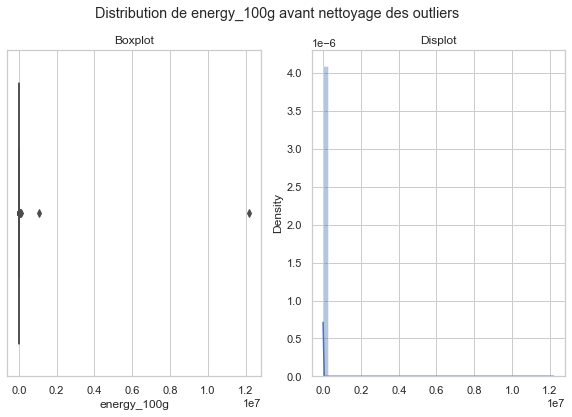

In [14]:
# Traitement des outliers

f, axes = plt.subplots(1, 2, figsize=(10, 6))
f.suptitle("Distribution de energy_100g avant nettoyage des outliers")
ax1 = sns.boxplot(x=dfF_f['energy_100g'], ax=axes[0])
ax1.set_title("Boxplot")
ax2 = sns.distplot(x=dfF_f['energy_100g'], ax=axes[1])
ax2.set_title("Displot")

#### Méthode par Z-Score (non executée car trop gourmand en ressource)

In [15]:
# Méthode par Z-Score - Très gourmand en ressource, non terminé

# from scipy import stats
# dfF_f[(np.abs(stats.zscore(dfF_f)) < 3).all(axis=1)]

#### Méthode par écart à la moyenne de +/- 3 sigmas

In [16]:
# Méthode par écart à la moyenne de +/- 3 sigmas

def outliers_n_sigma(df, n):
    df_cleaned = df.copy()
    for column in df.select_dtypes(include=['int32', 'float64']).columns.tolist():
        # Ecart à la moyenne <= n ecarts types
        df_cleaned = df_cleaned[np.abs(
            df_cleaned[column]-df_cleaned[column].mean()) <= (n*df_cleaned[column].std())]
    print("Taille avant traitement des outliers : ", df.shape,
          "\nTaille après traitement des outliers : ", df_cleaned.shape)
    return df_cleaned

In [17]:
dfF_f_o = outliers_n_sigma(dfF_f, 3)

Taille avant traitement des outliers :  (665626, 58) 
Taille après traitement des outliers :  (33764, 58)


In [26]:
dfF_f_o.isnull().sum().sort_values(ascending=False)

additives_en                               14740
additives_tags                             14740
stores                                     13062
labels_tags                                10987
labels_en                                  10987
labels                                     10987
packaging_tags                              9237
packaging                                   9237
quantity                                    5366
image_nutrition_small_url                   5347
image_nutrition_url                         5347
image_ingredients_small_url                 1826
image_ingredients_url                       1826
image_small_url                              970
image_url                                    970
brands                                       204
brands_tags                                  203
product_name                                  42
ingredients_that_may_be_from_palm_oil_n        0
created_t                                      0
energy_100g         

Pas de NaN dans les variables qui nous intéressent : pas de dropna() nécessaire (nécessaire que quand faible proportion de NaN dans les variables qui nous intéressent)

/Users/louisrageot/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Distplot')

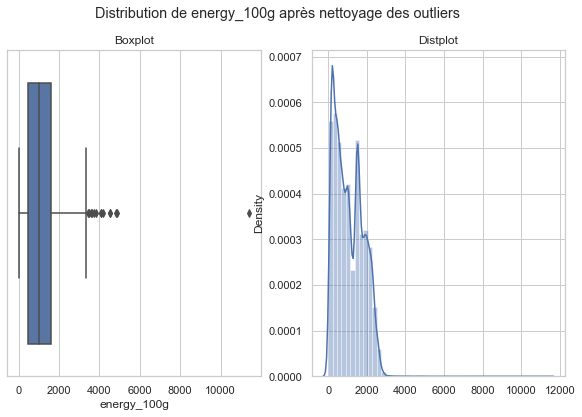

In [19]:
# Distribution après traitement des outliers

f, axes = plt.subplots(1, 2, figsize=(10, 6))
f.suptitle("Distribution de energy_100g après nettoyage des outliers")
ax1 = sns.boxplot(x=dfF_f_o['energy_100g'], ax=axes[0])
ax1.set_title("Boxplot")
ax2 = sns.distplot(x=dfF_f_o['energy_100g'], ax=axes[1])
ax2.set_title("Distplot")

Liste de variables pertinentes pour l'étude :
- Informations nutritionnelles
- Nombre d'additifs
- Nutriscore

### Export CSV du fichier nettoyé

In [22]:
# Export du de dfF_f_o en .csv pour la suite de l'étude
dfF_f_o.to_csv('en.openfoodfacts.org.products_cleaned_data.csv')